# Preguntas 11 y 12

# Regresion Lineal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Advertising.csv")
data.head()

In [ ]:
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
y = data["Sales"]

In [ ]:
x1 = X[["TV"]]
x2 = X[["Radio"]]
x3 = X[["Newspaper"]]

# Feature engineer Pregunta 13

In [ ]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("insurance.csv")
df.head()

* Remover registros duplicados

* Ver si hay valores nulos y eliminarlos

* Quitar la columna region

* Genere variables dummies (binarias) para el género de la persona y si es fumador o no, pensando en añadirlas posteriormente como variables independientes para explicar "charges".

## Correlacion de columnas Pregunta 14

In [ ]:
df = pd.read_csv("ML_Houses_dataset.csv")
df_houses = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
                       'Pesos', 'Alley', 'WallMat','SalePrice']]

corr = df_houses.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

# Clasificacion Pregunta 15

In [ ]:
df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],
                                        bins=[df_houses['SalePrice'].min()-1,
                                        df_houses['SalePrice'].mean(),
                                        df_houses['SalePrice'].max()+1],
                                        labels=['barato', 'caro'])

<ipython-input-22-651b70ccded2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y_encoder = LabelEncoder().fit(df_houses['SalePriceBinary'])
y = y_encoder.transform(df_houses['SalePriceBinary'])
X = df_houses.drop(columns=['GrLivArea','Alley','WallMat', 'SalePrice', 'SalePriceBinary'])

X_scaled = MinMaxScaler().fit_transform(X)

Después de efectuado el procedimiento anterior, se pide utilizar validación cruzada, con cv=10 y aplicar árboles de decisión

# Metricas Pregunta 16

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


# Ajustando Metricas Pregunta 17

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
y_pred = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]



# K-means Pregunta 18

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
random_state=42


X, y = make_blobs(n_samples=500, centers=4, random_state=random_state)

# SVM + Grid Search Pregunta 19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

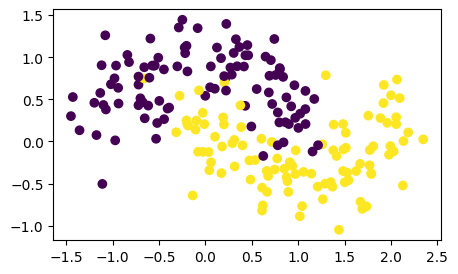

In [ ]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

In [ ]:
%%time

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from scipy import stats

# Instanciate model
model = SVC()

# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}

# Instanciate Random Search
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=3, verbose=0)


rsearch.fit(X,y)

CPU times: user 216 ms, sys: 50.3 ms, total: 267 ms
Wall time: 2.18 s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'coef0': [0, 0.1, 1], 'gamma': [0, 0.1, 1, 10, 100],
                         'kernel': ['sigmoid', 'rbf']},
             scoring='accuracy')